In [1]:
import os, sys

# Add Source Code folder to sys.path
BASE_DIR = r"C:\Users\husseien\Desktop\340915149_322754953\Source Code"

if BASE_DIR not in sys.path:
    sys.path.insert(0, BASE_DIR)

# Optional: change working directory (recommended)
if os.getcwd() != BASE_DIR:
    os.chdir(BASE_DIR)

# Now you can import setup_paths
import setup_paths  # this will run the code in setup_paths.py


import os

# Base data folder
DATA_DIR = r"C:\Users\husseien\Desktop\340915149_322754953\Source Code\data"

# Path to labeled train.csv
TRAIN_CSV = os.path.join(DATA_DIR, "train.csv")

# Path to folder containing all raw CSV files
FILES_DIRECTORY = os.path.join(DATA_DIR, "unlabeled", "unlabeled")

# Check
print("TRAIN_CSV exists:", os.path.exists(TRAIN_CSV))
print("FILES_DIRECTORY exists:", os.path.exists(FILES_DIRECTORY))
print("Example CSVs:", os.listdir(FILES_DIRECTORY)[:5])




CWD set to C:\Users\husseien\Desktop\340915149_322754953\Source Code
TRAIN_CSV exists: True
FILES_DIRECTORY exists: True
Example CSVs: ['0.csv', '1.csv', '10.csv', '100.csv', '1000.csv']


In [2]:
import pandas as pd
import torch
import os
from models_utils.GLOBALS import files_directory
from RF_XGB.RandomForest import get_rf_data, train_random_forest
from models_utils.utils import convert_to_features

c:\Users\husseien\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\cuda\__init__.py:287: UserWarning: 
NVIDIA GeForce RTX 5070 Laptop GPU with CUDA capability sm_120 is not compatible with the current PyTorch installation.
The current PyTorch install supports CUDA capabilities sm_37 sm_50 sm_60 sm_61 sm_70 sm_75 sm_80 sm_86 sm_90 compute_37.
If you want to use the NVIDIA GeForce RTX 5070 Laptop GPU GPU with PyTorch, please check the instructions at https://pytorch.org/get-started/locally/

  warnings.warn(


In [3]:
# get train data
data_type_1, data_type_2 = get_rf_data()

In [4]:
# train rf
rf_classifier_type1, label_encoder_type1 = train_random_forest(data_type_1, ['activity'], 200)
rf_classifier_type2, label_encoder_type2 = train_random_forest(data_type_2, ['activity'], 200)

Accuracy: 0.9660127106935618
Log Loss: 0.2614376589042812
Accuracy: 0.9569854248133665
Log Loss: 0.3947428930042906


In [5]:
# get and save results for test data
labels = ['brushing_teeth', 'idle', 'preparing_sandwich', 'reading_book', 'stairs_down', 'stairs_up', 'typing',
          'using_phone', 'using_remote_control', 'walking_freely', 'walking_holding_a_tray',
          'walking_with_handbag', 'walking_with_hands_in_pockets', 'walking_with_object_underarm',
          'washing_face_and_hands', 'washing_mug', 'washing_plate', 'writing']
results_list = []
sample_submission_path = os.path.join(DATA_DIR, "sample_submission.csv")

for i, file_id in enumerate(pd.read_csv(sample_submission_path)['sample_id'].to_list()):

    class_path = os.path.join(files_directory, f"{file_id}.csv")
    new_data = pd.read_csv(class_path)
    if new_data.shape[1] == 4:
        new_data = new_data[new_data.iloc[:, 0] == 'acceleration [m/s/s]'].iloc[:, 1:]
        data_x_tensor = torch.tensor(new_data["x"].values, dtype=torch.float32)
        data_y_tensor = torch.tensor(new_data["y"].values, dtype=torch.float32)
        data_z_tensor = torch.tensor(new_data["z"].values, dtype=torch.float32)
        res = rf_classifier_type1.predict_proba(convert_to_features(data_x_tensor, data_y_tensor, data_z_tensor))
        res_dict = dict(zip(label_encoder_type1.inverse_transform(rf_classifier_type1.classes_), res[0]))
    else:
        data_x_tensor = torch.tensor(new_data["x [m]"].values, dtype=torch.float32)
        data_y_tensor = torch.tensor(new_data["y [m]"].values, dtype=torch.float32)
        data_z_tensor = torch.tensor(new_data["z [m]"].values, dtype=torch.float32)
        res = rf_classifier_type2.predict_proba(convert_to_features(data_x_tensor, data_y_tensor, data_z_tensor))
        res_dict = dict(zip(label_encoder_type2.inverse_transform(rf_classifier_type2.classes_), res[0]))

    result_dict = {label: res_dict.get(label, 0) for label in labels}
    result_dict['sample_id'] = file_id
    results_list.append(result_dict)

results = pd.DataFrame(results_list, columns=['sample_id'] + labels)
results.to_csv('results_rf5.csv', index=False)

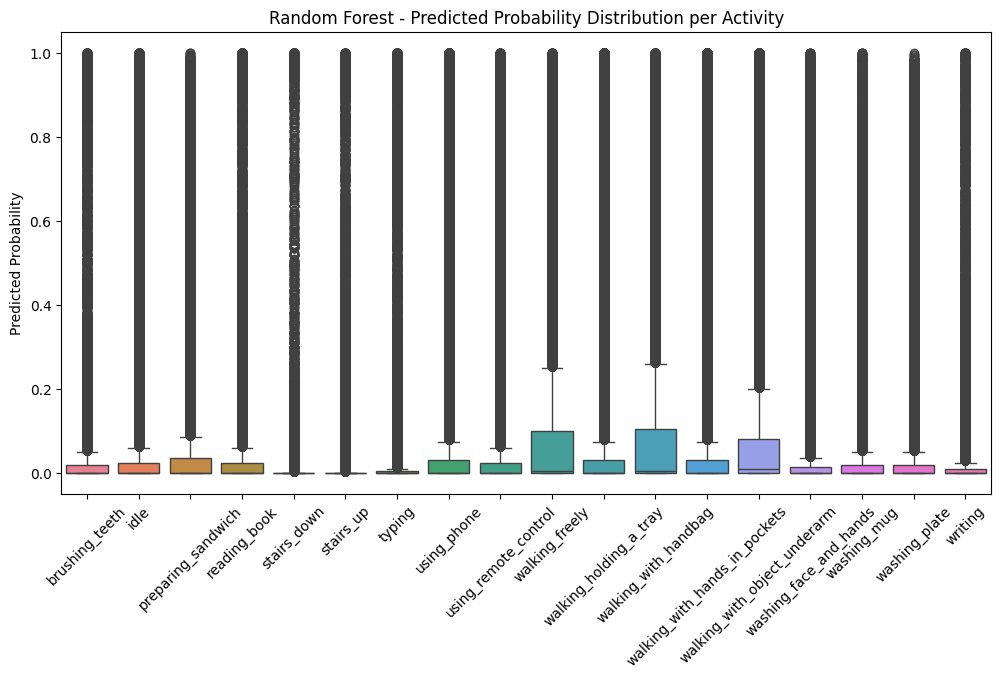

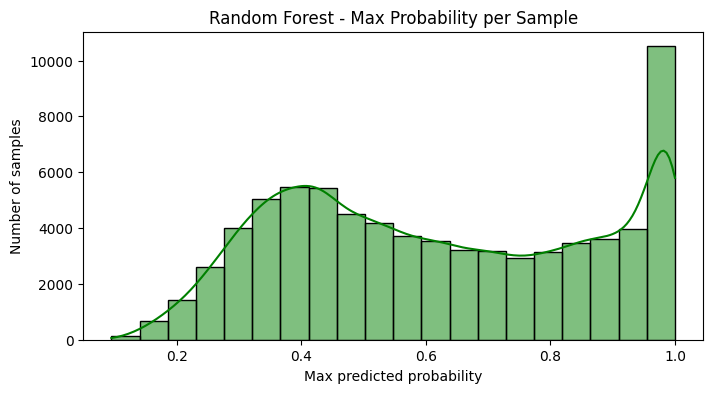

C:\Users\husseien\AppData\Local\Temp\ipykernel_23364\47484864.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_classes.index, y=top_classes.values, palette='Greens')


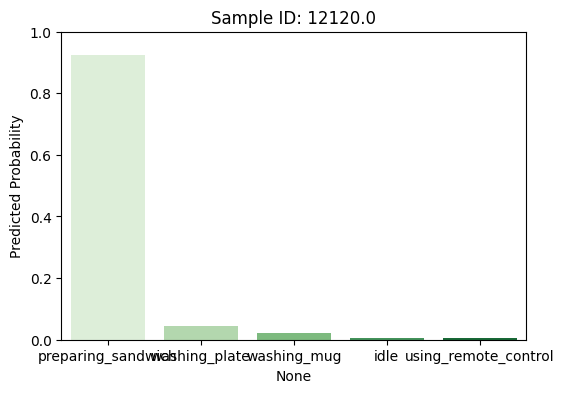

C:\Users\husseien\AppData\Local\Temp\ipykernel_23364\47484864.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_classes.index, y=top_classes.values, palette='Greens')


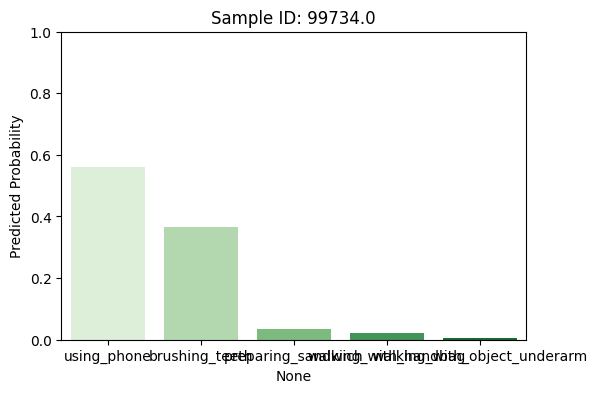

C:\Users\husseien\AppData\Local\Temp\ipykernel_23364\47484864.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_classes.index, y=top_classes.values, palette='Greens')


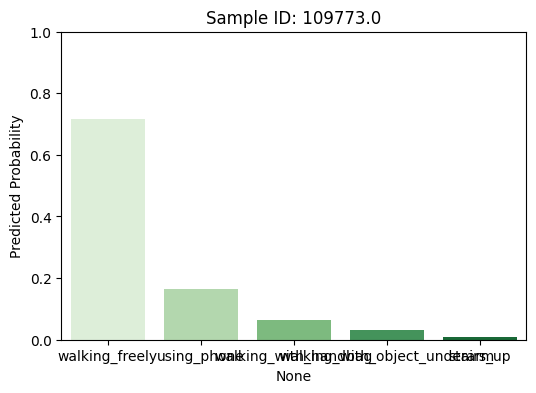

C:\Users\husseien\AppData\Local\Temp\ipykernel_23364\47484864.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_classes.index, y=top_classes.values, palette='Greens')


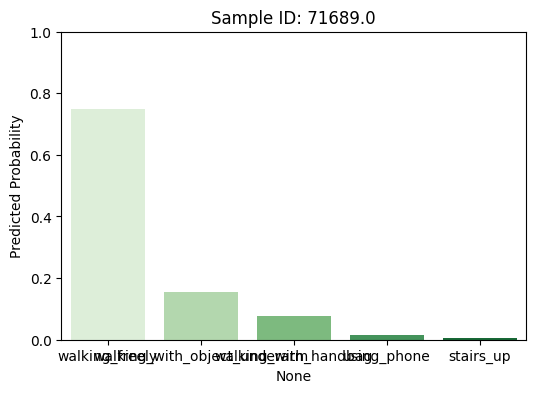

C:\Users\husseien\AppData\Local\Temp\ipykernel_23364\47484864.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_classes.index, y=top_classes.values, palette='Greens')


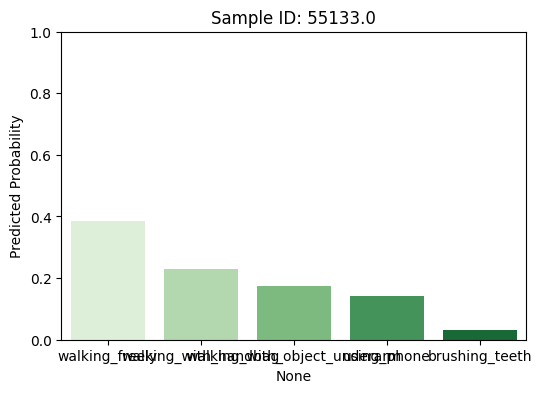

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load results
results = pd.read_csv('results_rf5.csv')

# Columns with activities
activity_cols = [c for c in results.columns if c != 'sample_id']

# 1. Distribution of predicted probabilities for each activity
plt.figure(figsize=(12,6))
sns.boxplot(data=results[activity_cols])
plt.xticks(rotation=45)
plt.title("Random Forest - Predicted Probability Distribution per Activity")
plt.ylabel("Predicted Probability")
plt.show()

# 2. Histogram of max probability per sample (model confidence)
max_probs = results[activity_cols].max(axis=1)
plt.figure(figsize=(8,4))
sns.histplot(max_probs, bins=20, kde=True, color='green')
plt.title("Random Forest - Max Probability per Sample")
plt.xlabel("Max predicted probability")
plt.ylabel("Number of samples")
plt.show()

# 3. Top 5 predicted classes per random sample
sample = results.sample(5)
for _, row in sample.iterrows():
    top_classes = row[activity_cols].sort_values(ascending=False)[:5]
    plt.figure(figsize=(6,4))
    sns.barplot(x=top_classes.index, y=top_classes.values, palette='Greens')
    plt.title(f"Sample ID: {row['sample_id']}")
    plt.ylabel("Predicted Probability")
    plt.ylim(0,1)
    plt.show()
